In [1]:
from skimage import io


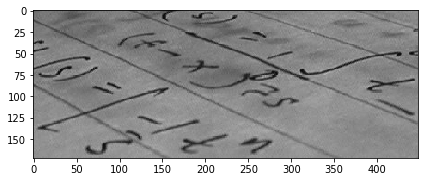

In [2]:
from skimage import data, io

# 글자 인식(OCR)에 활용하는 예제 중 하나
io.imshow(data.text())
io.show()

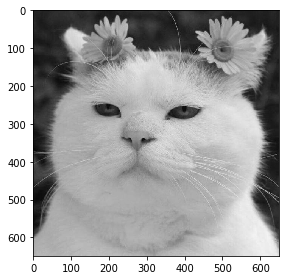

In [2]:
from skimage import color, io

img = io.imread('cat.jpg')
gray = color.rgb2gray(img)
io.imshow(gray)
io.show()

In [5]:
from skimage import io
from skimage import filters

img = io.imread('cat.jpg')
# 가우시안 통계함수가 라플라시안 적분을 기반으로 산출된다.
# 그래서 sigma 값이 별도로 존재하는데
# 이 값이 높으면 높을수록 분산이 커지기 때문에
# 숫자가 크면 클수록 모자이크가 강화된다.
out = filters.gaussian(img, sigma = 7)
io.imshow(out)
io.show()

C:\Users\201621238\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  if __name__ == '__main__':


In [6]:
from skimage import io
from skimage.morphology import disk
from skimage import color
from skimage import filters

img = io.imread('cat.jpg')
img = color.rgb2gray(img)
out = filters.median(img, disk(15))
io.imshow(out)
io.show()

In [8]:
from PIL import Image
from PIL import ImageFilter

img = Image.open('cat.jpg')
# grayscale 작업을 해서 영상 잡음을 최소화시킴
img = img.convert("L")
# 전용 필터를 만들기 위한 커스텀 연산 커널을 만들었다.
new_img = img.filter(
    ImageFilter.Kernel(
        # 3 by 3 행렬의 연산 커널이며
        # 연산 대상은 [1,2,3]
        #             [4,5,6]
        #             [7,8,9]
        # 위의 행렬이 이미지 행렬과
        # Convolution 연산을 수행하게 된다.
        # 그러면 결국 미분이 진행된다.
        # 첫번째 인자는 행렬의 차원
        # 두번째 인자는 해당 행렬에 배치된 값들
        (3,3),[1,2,3,4,5,6,7,8,9]
    )
)
new_img.show()

In [9]:
from PIL import Image
from PIL import ImageFilter

img = Image.open('cat.jpg')
img = img.convert("L")
new_img = img.filter(
    ImageFilter.Kernel(
        # 소벨 필터를 살짝 가공한 연산 커널임
        # 소벨 필터를 공부하기 전에
        # 공업수학과 벡터의 미분인 편도함수를 공부해야 함
        (3,3),[1,0,3-1,5,0,-5,1,0,1]
    )
)
# 필터 이론에 대해 조금만 설명하자면
# 철수가 A 지점에 있다.
# 철수는 B 지점을 가려고 한다.
# A에서 B 사이의 거리는 10m 이고
# 철수가 A에서 B를 갔다가 돌아오는데 100분이 걸렸다.
# 철수의 이동 속도는?
# 20m, 100분 s = vt -> 20 / 100분 = 속도
# 여기서 봤던 이 속도라는 개념이 순수한 속도?
# 아니면 평균 속도 개념인가? 평균속도.
# 결국 컴퓨터가 limit x -> 0 을 표현할 수 없기 때문에
# 미분 또한 평균으로 접근하게 된다.
# 즉, 단순히 삼각형의 기울기 구하기 문제가 된다는 의미다.
new_img.show()

In [15]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu, threshold_local
from skimage.io import imread
from skimage.color import rgb2gray

img = imread('highway.jpg')
img = rgb2gray(img)

# Threshold(임계치)를 잡아오는 함수(threshold_otsu)
thresh_value = threshold_otsu(img)
#지정한 임계치보다 작은 값을 흰색이나 검정색으로 배치하려는 것
thresh_img = img > thresh_value
print("img =", img)
print("thresh_img =", thresh_img)

# 영역을 지정해서 반복적으로 패턴을 검색
# 적정 블록 크기 35와 offset 이동값 10을 가지고
# 반복적으로 Thresholding 작업을 진행함
block_size = 35
adaptive_img = threshold_local(thresh_img, block_size, offset = 10)

# 행이 3개다. - 즉 그림을 3행으로 배치하기 위함
fig, axes = plt.subplots(nrows = 3, figsize = (20, 10))
# 각각의 그래프 축들이 생기는데
# 첫번째 그림, 두번째 그림, 세번째 그림
ax0, ax1, ax2 = axes
# 각각의 그림에 자동으로 Grayscale 처리를 해줌
plt.gray()

ax0.imshow(img)
ax0.set_title('Origin')

ax1.imshow(thresh_img)
ax1.set_title('Global Thresholding')

ax2.imshow(adaptive_img)
ax2.set_title('Adaptive Thresholding')

img = [[0.17838314 0.32150902 0.26660706 ... 0.3010898  0.29716824 0.30501137]
 [0.29210863 0.44699922 0.40778353 ... 0.54814863 0.54814863 0.55401961]
 [0.27052863 0.43523451 0.40160706 ... 0.49127451 0.49519608 0.50696078]
 ...
 [0.29216824 0.28658    0.22245098 ... 0.19340078 0.19340078 0.20516549]
 [0.28824667 0.29050157 0.23029412 ... 0.20124392 0.19732235 0.20908706]
 [0.30393294 0.29834471 0.23813725 ... 0.22477333 0.2169302  0.22477333]]
thresh_img = [[False False False ... False False False]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Text(0.5, 1.0, 'Adaptive Thresholding')

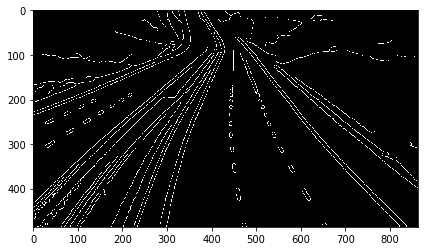

In [17]:
from skimage import io
from skimage import feature
from skimage import color
img = io.imread('highway.jpg')
img = color.rgb2gray(img)
edge = feature.canny(img,3)
io.imshow(edge)
io.show()

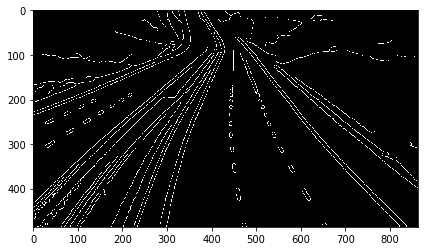

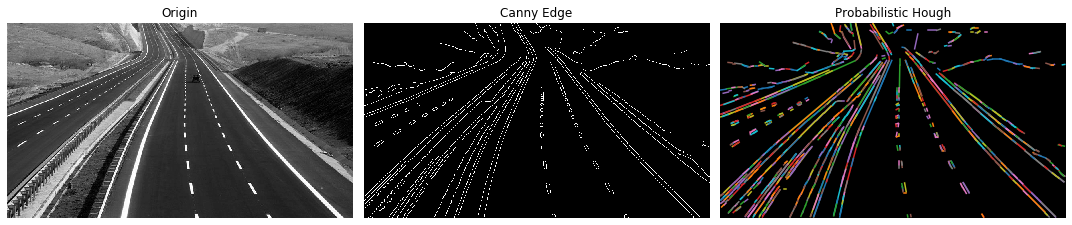

In [19]:
import matplotlib.pyplot as plt
from skimage.transform import(hough_line, probabilistic_hough_line)
from skimage.feature import canny
from skimage import io, color

img = io.imread('highway.jpg')
img = color.rgb2gray(img)

edges = canny(img, 3)

io.imshow(edges)
io.show()

# 허프라인이라고 하는 녀석이 있는데
# 내부 계산에는 삼각함수가 사용되며
# 통계적 추론이 같이 적용됨
# threshold는 임계치(threshold_otsu, threshold_local)
# 결국 threshold는 어떤 값을 버릴지 결정하는 수치
# 이 값은 최소치는 0이고 최대치는 255에 해당
# color(색상) 비트가 8비트 - 2^8 = 256개 - 0 ~ 255
lines = probabilistic_hough_line(
    edges, threshold = 10, line_length = 5, line_gap = 3
)

fig, axes = plt.subplots(
    1, 3, figsize = (15, 5), sharex = True, sharey = True
)

ax = axes.ravel()
ax[0].imshow(img, cmap = plt.cm.gray)
ax[0].set_title('Origin')
ax[1].imshow(edges, cmap = plt.cm.gray)
ax[1].set_title('Canny Edge')
ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot(
        (p0[0], p1[0]), (p0[1], p1[1])
    )
ax[2].set_xlim(0, img.shape[1])
ax[2].set_ylim(img.shape[0], 0)
ax[2].set_title('Probabilistic Hough')
for a in ax:
    a.set_axis_off()
plt.tight_layout()
plt.show()

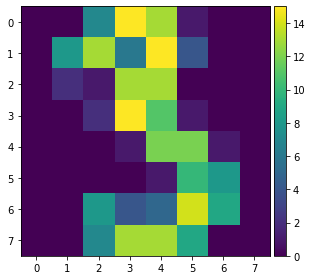

Performance Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       131
           1       0.97      0.96      0.96       137
           2       1.00      1.00      1.00       131
           3       0.98      0.92      0.95       136
           4       0.99      0.97      0.98       139
           5       0.96      0.99      0.98       136
           6       0.99      0.99      0.99       138
           7       0.97      0.99      0.98       134
           8       0.95      0.97      0.96       130
           9       0.94      0.98      0.96       136

    accuracy                           0.97      1348
   macro avg       0.98      0.97      0.97      1348
weighted avg       0.98      0.97      0.97      1348




C:\Users\201621238\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression

mnist = datasets.load_digits()
imgs = mnist.images
data_size = len(imgs)
io.imshow(imgs[3])
io.show()

# Image 전처리
imgs = imgs.reshape(len(imgs), -1)
labels = mnist.target

# 로지스틱 회귀 분석 준비
LR_classifier = LogisticRegression(
    C = 0.01, penalty = 'l2', tol = 0.01
)

# 3/4 는 학습에 활용, 1/4은 평가용으로 활용
LR_classifier.fit(
    imgs[:int((data_size / 4) * 3)],
    labels[:int((data_size / 4) * 3)]
)

# 평가 진행
predictions = LR_classifier.predict((imgs[int((data_size / 4)):]))
target = labels[int((data_size / 4)):]

# 성능 측정
print("Performance Report: \n%s\n" %
     (metrics.classification_report(target, predictions))
)

[7]


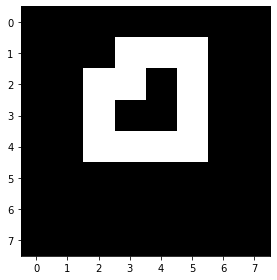

In [24]:
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from skimage import io, color, feature, transform
mnist = datasets.load_digits()
imgs = mnist.images
data_size = len(imgs)
# Image 전처리
imgs = imgs.reshape(len(imgs), -1)
labels = mnist.target
# 로지스틱 회귀 분석 준비
LR_classifier = LogisticRegression(
    C = 0.01, penalty = 'l2', tol = 0.01, max_iter = 1000000000
)
# 3/4 는 학습에 활용, 1/4은 평가용으로 활용
LR_classifier.fit(
    imgs[:int((data_size / 4) * 3)],
    labels[:int((data_size / 4) * 3)]
)
# 사용자가 지정한 이미지를 넣어서
# 실제로 이미지의 숫자를 판별하는지 검사해보도록 한다.
digit_img = io.imread('digit.jpg')
digit_img = color.rgb2gray(digit_img)
# MNIST 사용시 주의할점: 이미지 크기를 28 x 28 보다 작게 맞춰야함
digit_img = transform.resize(digit_img, (8, 8), mode="wrap")
digit_edge = feature.canny(digit_img, sigma = 1)
io.imshow(digit_edge)
digit_edge = [digit_edge.flatten()]
# 평가 진행
predictions = LR_classifier.predict(digit_edge)
print(predictions)

In [26]:
import cv2

img = cv2.imread('cat.jpg')
cv2.imshow("image",img)
cv2.waitKey()

113

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg')
# OpenVB가 처리하는 Color Space 방식과
# MatplotLib이 처리하는 Color Space 방식이 다르다
# Color Space
plt.imshow("image",img)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('cat.jpg')
# cv2.cvtColor는 ConvertColor의 약자
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
import cv2, numpy as np

cv2.namedWindow('Test')

fill_val = np.array([255,255,255], np.uint8)

def trackbar_callback(idx, val):
    fill_val[idx] = val
    
cv2.createTrackbar('R', 'Test', 255, 255, lambda v: trackbar_callback(2,v))

while True:
    img = np.full((500,500,3), fill_val)
    cv2.imshow('Test',img)
    key = cv2.waitKey()
    key = np.full((500,500,500))

TypeError: full() missing 1 required positional argument: 'fill_value'

In [33]:
import cv2

cam = cv2.VideoCapture(0)
while(cam.isOpened()):
    ret, frame = cam.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
cam.release()
cv2.destroyAllWindows()

In [42]:
import cv2

fps = 30
title = 'normal speed video'
delay = int(1000/fps)

cam = cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret != True:
        break
        
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

In [46]:
import cv2
import numpy as np

fps = 30
title = 'normal speed video'
delay = int(1000/fps)

cam = cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret != True:
        break
        
    # 여기에 추가적으로 영상내에 적용할 함수들을 작성하면 된다.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
    # Canny 까지 넣어주면 실시간 처리 관점에서
    # 벌써 살짝 지연되는 것이 느껴지게 된다.
    # 그만큼 영상 처리라는 것이 굉장히 무거운 작업이다.
    # 그래서 무조건적으로 해당 작업들은
    # 멀티 프로세스, 스레드 기반으로 동작시켜야 한다.
    edges = cv2.Canny(gray, 235, 243, 3)
        
    cv2.imshow('frame',frame)
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

In [52]:
import cv2
import numpy as np

# Region of Interest(관심영역)
# 첫번째 인자는 영상 프레임
# 두번째 관심영역에 해당하는 정점(좌표)
def roi(img, vertices):
    mask = np.zeros_like(img)
    
    if len(img.shape)>2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,)*channel_count
    else:
        ignore_mask_color = 255
        
    # print(ignore_mask_color)
    # print(mask)
    
    # mask는 현재 0
    # ignore_mask_color는 현재 255
    # vertices라는 것은 우리의 관심 영역
    # vertices에 해당하는 영역은 원본값을 유지
    # vertices에 해당하지 않는 영역은 전부 

    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

fps = 30
title = 'normal speed video'
delay = int(1000/fps)

cam = cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret != True:
        break
        
    # 영상 프레임을 가져오면
    # 해당 영상의 높이값과 폭을 얻을 수 있다.
    height = frame.shape[0]
    width = frame.shape[1]
    
    # 우리가 관심을 가지려고 하는 영역을 지정(삼각형)
    region_of_interest_vertices = [
        (0,height),
        (width / 2, height/2),
        (width, height)
    ]
    
    edges = cv2.Canny(gray, 235, 243, 3)
    
    cropped_img = roi(
        edges,
        np.array(
            [region_of_interest_vertices], np.int32
        )
    )
    
    
    cv2.imshow('frame',cropped_img)
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
        
cam.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import math
import numpy as np
# Region of Interest(관심 영역)
# 첫번째 인자는 영상 프레임
# 두번째 관심영역에 해당하는 정점(좌표)
def roi(img, vertices):
    mask = np.zeros_like(img)
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255, ) * channel_count
    else:
        ignore_mask_color = 255
    #print(ignore_mask_color)
    #print(mask)
    # mask는 현재 0
    # ignore_mask_color는 현재 255
    # vertices라는 것은 우리의 관심 영역
    # vertices에 해당하는 영역은 원본값을 유지
    # vertices에 해당하지 않는 영역은 전부 제거됨
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    # 최종적으로 roi 영역이 지정된 영상을 획득한다.
    return masked_img
def draw_lines(img, lines, color=[0, 255, 0], thickness=3):
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8
    )
    img = np.copy(img)
    if lines is None:
        return
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(
                line_img, (x1, y1), (x2, y2), color, thickness
            )
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img
fps = 30
title = 'normal speed video'
delay = int(1000 / fps)
cam = cv2.VideoCapture("challenge.mp4")
while(cam.isOpened()):
    ret, frame = cam.read()
    if ret != True:
        break
    # 영상 프레임을 가져오면
    # 해당 영상의 높이값과 폭을 얻을 수 있다.
    height = frame.shape[0]
    width = frame.shape[1]
    # 우리가 관심을 가지려고 하는 영역을 지정(삼각형)
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height)
    ]
    # 여기에 추가적으로 영상내에 적용할 함수들을 작성하면 된다.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
    # Canny 까지 넣어주면 실시간 처리 관점에서
    # 벌써 살짝 지연되는 것이 느껴지게 된다.
    # 그만큼 영상 처리라는 것이 굉장히 무거운 작업이다.
    # 그래서 무조건적으로 해당 작업들은
    # 멀티 프로세스, 스레드 기반으로 동작시켜야 한다.
    edges = cv2.Canny(gray, 235, 243, 3)
    # 관심 영역을 제외한 영상의 나머지 부분을 잘라버린다.
    cropped_img = roi(
        edges,
        np.array(
            [region_of_interest_vertices], np.int32
        )
    )
    # 주행을 보조할 선을 그리도록 한다.
    lines = cv2.HoughLinesP(
        cropped_img,
        rho = 6,
        theta = np.pi / 180,
        threshold = 160,
        lines = np.array([]),
        minLineLength = 40,
        maxLineGap = 25
    )
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            slope = (y2 - y1) / (x2 - x1)
        if math.fabs(slope) < 0.5:
            continue
        if slope <= 0:
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else:
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])
    min_y = int(frame.shape[0] * (3 / 5))
    max_y = int(frame.shape[0])
    
    # np.poly1d를 통해 1차선을 만듦
    poly_left = np.poly1d(np.polyfit(
        left_line_y,
        left_line_x,
        deg = 1
    ))
    left_x_start = int(poly_left(max_y))
    left_x_end = int(poly_left(min_y))
    poly_right = np.poly1d(np.polyfit(
        right_line_y,
        right_line_x,
        deg = 1
    ))
    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))
    # 실제 영상에 표기할 선을 그린다.
    line_img = draw_lines(
        frame,
        [[
            [left_x_start, max_y, left_x_end, min_y],
            [right_x_start, max_y, right_x_end, min_y],
        ]],
        thickness = 5
    )
    cv2.imshow('frame', line_img)
    if cv2.waitKey(delay) & 0xFF == ord('q'):
        break
cam.release()
cv2.destroyAllWindows()

TypeError: expected non-empty vector for x